# 10. 피부암 초기 진단

*   이미지 데이터와 정형 데이터 병합 및 전처리 방법을 이해한다.
*   이미지 학습 알고리즘 CNN에 대해 더 깊게 이해한다.
*   심화 수준의 이미지 학습 인공지능 모델을 제작한다.



# 학습률 개선과 조기 종료




*   좀 더 정교한 인공지능을 만들기 위한 두 가지 함수를 짚고 넘어가고자 한다. 바로 ‘**학습률 개선(ReduceLROnPlateau)’**과  **‘조기 종료(EarlyStopping)'** 이다.


---


*   **학습률 개선**: 지역 최소화 문제(극소점,Local Minima)에 빠져 있을 경우 Learning Rate(학습률)를 조절하여 다른 곳까지 탐색할 수 있게 하는 함수
*   **조기종료**: 이미 최소의 loss 값인 지점(Global Minima)에 도달해 놓고도 학습 횟수(ephochs)가 남을 경우 학습을 중단하게 하는 함수
 
 



#피부암 데이터셋 불러오기

피부암 이미지를 모아둔 데이터 세트를 캐글(kaggle) API를 활용하여 불러오자. 



*   API 업로드 참고자료 : https://teddylee777.github.io/kaggle/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95/

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()
#kaggle api 업로드하기

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip /content/skin-cancer-mnist-ham10000.zip

# 데이터가 많아서 시간이 오래 걸리며 런타임 종류를 None으로 하는 것을 추천

glob( )함수를 이용하여 데이터 세트를 묶어 **image_lis**t에 경로를 저장한다. 

경로명을 가져오는 **basename( )함수**로 파일명과 파일 위치 딕셔너리를 만든다



In [ ]:
import numpy as np
import pandas as pd
import io
import os
from glob import glob

In [ ]:
image_list = glob(_____________('/content/HAM10000_images_part_1/','*.jpg'))
image_list = image_list + glob(_____________('/content/HAM10000_images_part_2/','*.jpg'))
imageid_path_dict = {____________________________________________________
                     for x in image_list}

imageid_path_dict

# 데이터가 많아 실행시간이 오래걸리니, 주의하자

# 메타 데이터 전처리하기

*   **메타(Meta) 데이터** : 데이터의 정보를 저장하는 데이터

피부암 메타 데이터 파일(HAM10000_metadata.csv)을 불러와 데이터를 확인한다.




In [ ]:
data = pd.read_csv('/content/HAM10000_metadata.csv')
data.head()

메타 데이터에 추가 정보를 덧붙여 데이터의 이해를 높인다.

**map( )함수**로 병명 딕셔너리와 이미지 경로 딕셔너리를 매칭시킨다.

In [ ]:
data._____________________________

나이(age)데이터 중 1개에 NaN 값을 평균값으로 처리

In [ ]:
data.isna().any()

In [ ]:
data.isna().any().sum()

In [ ]:
data['age']._________________________________________________
data['age'] = _______________________________

메타 데이터에 추가 정보를 덧붙여 데이터의 이해를 높인다.

**map( )함수**로 병명 딕셔너리와 이미지 경로 딕셔너리를 **매칭**시킨다.

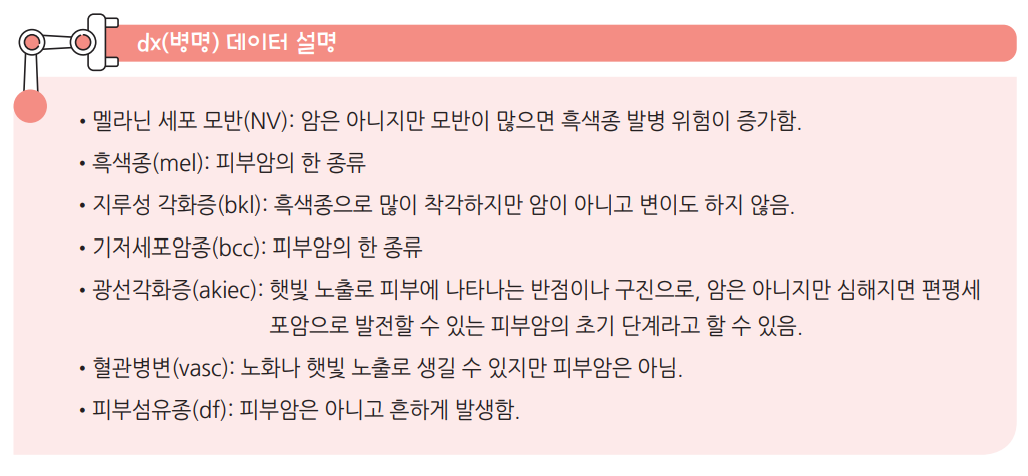

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}

In [ ]:
data['cell_type'] = _____________________________________
data['path'] = __________________________________________

In [ ]:
data.head()

# 이미지 데이터 시각화하기

1.   이미지 처리와 시각화에 필요한 모듈을 불러오고 **람다식을 실행**한다.
2.   이미지를 불러와서 **적합한 크기**(28, 28)로 **변환**한다.
3.   **‘image_pixel’**이라는 열(Column)을 생성하여 변환된 이미지를 저장한다 




In [ ]:
from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data['image_pixel'] = data['path'].___________________________________________________________

In [ ]:
data.head()

실제 피부암 데이터를 시각화해서 살펴보기 위해 병명당 두 개씩 이미지 데이터를 추출해보자.


1.   데이터를 **병명(dx)**으로 **그룹화(groupby)**해준다
2.   각 병명 데이터 중 **0번과 1번에 저장된 데이터**의 **9번열**(image_pixel) 과 **7번열**(cell_type)을 불러와 sample_data에 저장한다.







In [ ]:
sample_data = data.groupby('dx')._____________________________________________
sample_data

*   **반복문**으로 14개의 이미지를 시각화한다.
     - 7가지 피부질환 X 이미지 2장 씩
*   **subplot(  )**으로 적절한 크기로 각각 그래프 그리기
*   **imshow(  )**로 14개의 작은 subplot에 이미지를 시각화
*   이미지 제목(title)에 **병명을 적어주기**
*   **axis(“off”)** 설정으로 그래프 축을 제거

In [ ]:
plt.figure(figsize=(22, 32))
for i in range(14):
    plt.subplot(7, 5, i + 1)
    plt._____________________________________________
    plt.________________________________
    plt.axis("off")
plt.show();

# 이미지 데이터 전처리하기

*  카테고리 문자형 병명 데이터를 0~6까지 숫자로 라벨링을 한다
*  라벨링 숫자와 병명 딕셔너리를 만들고 매핑해 준다.

---

*  ‘label’이라는 열(Column)을 생성
*  ‘label’을 기준으로 정렬 및 index를 초기화해 준다.


In [ ]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}
reverse_label_mapping = dict((value, key) for key, value in label_mapping.items())

In [ ]:
data['label'] = _____________________________________________

data = ____________________
data = ____________________

라벨링으로 그룹화해 막대그래프와 개수를 출력해보자

*   멜라닌 세포 모반(NV) 데이터가 2/3

**불균형이 발생한 데이터**로 학습한 인공지능은 개수가 많은 데이터로 정답을 내는 경향이 있다
*   정답일 확률이 높다 VS **많은 것으로 찍는다**

➡ **데이터 전처리**를 통해 해결해야 한다 

In [ ]:
plt.____________________________________________________________
print(________________________________________)



*   해결방법 : 데이터를 복제해서 수를 비슷하게 맞춘다.
    * 이미지 데이터를 복사해 ‘frames’에 추가
    * ‘frames’를 concat(  )로 합친 후‘final_data’에 저장

*   4만 5,756개의 피부질환 이미지 데이터가 균형 있게 존재한다.



In [ ]:
counter = 0
frames = [data]
for i in [4,4,11,17,45,52]:
    counter+=1
    index = data[data['label'] == counter].index.values
    df_index = __________________________________________________
    df_index = __________________________________________________
    frames.append(df_index)

In [ ]:
final_data = _________________________

print(data.shape)
print(final_data.shape)

In [ ]:
plt.bar([0,1,2,3,4,5,6], final_data.groupby('label')['index'].count())
print(final_data.groupby('label')['index'].count())



*   ‘image_pixel’을 넘파이 형식으로 변환하여 독립 변수(X_aug)에 저장.

*   라벨링된 병명을 종속 변수(Y_aug)에 저장.



In [ ]:
X_aug = ___________________________________
X_aug = _________________________
Y_aug = ________________________________
print(X_aug.shape)
print(Y_aug.shape)

#CNN 이미지 학습

*   이미지 데이터를 학습하기 위해 필요한 여러 모듈을 불러온다 
*   훈련 데이터와 테스트 데이터를 8:2 비율로 나눈 후   **이미지 학습 데이터**를 생성한다(*ImageDataGenerator*)
     * 정확도를 높이기 위해 이미지를 변환하여 데이터를 증식




In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
tf.random.set_seed(3)
X_train, X_test, Y_train, Y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=3)
    
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
train_datagen.fit(X_train)

*   테스트 데이터에 **정규화 작업**을 한다.


In [ ]:
test_datagen = ___________________________________
test_datagen.fit(X_test)

*   CNN 모델 생성 함수를 정의한다.
    * Conv2D, MaxPool2D

*   앞 Unit과 다른 점
padding을 ‘same’으로 설정 
    * 이유 : 이미지 형태가  변환되는 것을  막기 위해
*   sparse_categorical_crossentropy(  )로  손실 함수를 계산


In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = ________________________________________,
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model.summary())
    return model;



*   CNN 모델 학습 함수를 생성한다.
*   **조기 종료와 학습률 개선**을 설정해 준다
 -  **patience:** 검증 데이터의 오차(val_loss)를 학습 
 중단 기준으로 몇 번 기다려 줄지 설정
 -  **verbose=1** : 매번 결과 정보를 출력




In [ ]:
def train_model(model, X_train, Y_train, EPOCHS):
    early_stop = ______________________________________________________________________
    
    reduce_lr = __________________________________________________________________
    
    history = model.fit(X_train, Y_train, validation_split=0.2, batch_size = 64, epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    return history

CNN 모델 학습 결과를 **시각화 함수**를 생성한다.
 

*   첫 번째 그래프(row=1, col=1)에는 *훈련 데이터 와 검증 데이터*의 정확도 
*   두 번째 그래프(row=1, col=2)에는 *오차*를 출력




In [ ]:
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], name='train_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], name='val_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], name='train_loss'), row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], name='val_loss'), row=1, col=2)
    fig.show()

**k-fold를 생성**하고 **CNN 모델을 생성**한다.

   * 교차 검증 1회당 50번의 학습(epochs)을 진행한다.


In [ ]:
num_folds = 5
acc_per_fold=[]
loss_per_fold=[]
kfold = _____________________________________________________
fold_no=1
epochs = 50
model=create_model()

kfold.split() 함수로 훈련 데이터로 **교차 검증**하면서 학습하고 **학습 결과를 시각화**한다.


*   첫 번째 교차 검증
   * 4번의 학습 개선과 30번째 학습에서 조기 종료가 발생

   * 학습을 거듭할수록 좋아지다가 15번째 이후로 수준이 비슷해 짐.
*   다섯 번째 교차 검증
   * 99% 이상의 정확도와 0.1 미만의 오차에서 학습을 종료



In [ ]:
for train,test in kfold.split(X_train, Y_train):
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history = train_model(model, X_train[train], Y_train[train],EPOCHS=epochs)
  plot_model_training_curve(history)

  scores = model.evaluate(X_train[test], Y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  model_file='skin_caner_5folds_'+str(fold_no)+'.h5'
  model.save(model_file)
  
  fold_no = fold_no + 1

In [ ]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# CNN 모델 테스트하기


CNN 모델을 테스트 데이터에 적용하고 평가해보자.
 

*   evaluate( )로 테스트한 결과 98.328%라는 높은 정확도를 보임.




In [ ]:
model_acc = _________________________________________________
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 98.328%


predict(  ) 함수로 예측한 값(y_pred)과 실제 값(Y_test)을 바탕으로 병명마다 정확도를 비교한다.


In [ ]:
y_true = np.array(Y_test)
y_pred = model.predict(X_test)
y_pred = __________________________________________________
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())
print(clr)

In [ ]:
sample_data = X_test[:15]
prediction = model.predict(sample_data)

plt.figure(figsize=(22, 12))
for i in range(15):
  plt.subplot(3, 5, i + 1)
  plt.imshow(sample_data[i])
  prediction_probability = np.amax(prediction[i]).round(2)
  plt.title(label_mapping[y_true[i][0]] + ' | ' + label_mapping[y_pred[i]] + ' ' + str(prediction_probability*100)+ '%' )
  plt.axis("off")
plt.show()

혼동 행렬 함수에 학습한 CNN 정보를 넣으면 피부질환을 분류결과를 혼동 행렬로 표현할 수 있다.

*   ‘cmap’이라는 기능을 통해 데이터 값에 맞춰 색 조합이 가능

*    itertools(파이썬 라이브러리) 모듈을 사용하여, 혼동 행렬을 시각적으로 매력 있게 표현 가능



In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, name, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(8,6))
    plt.________________________________________
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in ____________________________________________________________:
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

In [ ]:
def create_confusion_matrix(model, x_test_normalized, y_test, cm_plot_labels, name, y_true,y_pred):

    y_predict_classes, y_true_classes = y_pred, y_true
    confusion_matrix_computed = confusion_matrix(y_true_classes, y_predict_classes)
    plot_confusion_matrix(confusion_matrix_computed, cm_plot_labels, name) 

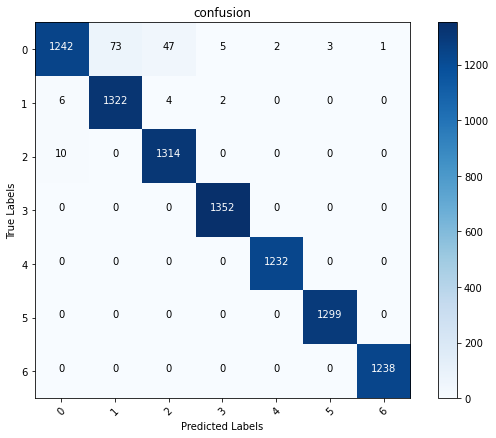

In [ ]:
create_confusion_matrix(model, X_test, Y_test, label_mapping, 'confusion', y_true, y_pred)

# 더 알아보기

팬의 조언에 따라 가슴의 점을 제거한 수영 선수 맥 호턴(Mack Horton)

➡ **우리가 제작한 CNN 이미지 분류 모델로 테스트를 해서 병명을 알아보는 건 어떨까?**

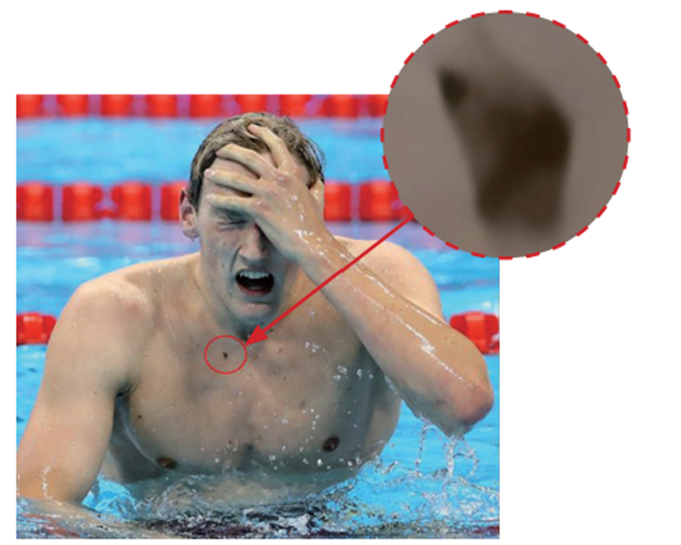

In [ ]:
files.upload()

테스트 결과, **멜라닌 세포 모반(NV)**으로 예측하는 것을 확인 할 수 있다.

In [ ]:
test_img = image.load_img('/content/Mack_Horton_Skin.jpg', target_size=((28,28)))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
prediction_idx = np.argmax(prediction)
test_image = plt.imread('/content/Mack_Horton_Skin.jpg')
plt.imshow(test_image)
plt.title('Prediction Result :' + label_mapping[prediction_idx])
plt.axis("off")

In [ ]:
print('===============================')
print('prediction per disease')
print('===============================')
for i in range(7):
  print(f'> {label_mapping[i]} : {(prediction[0][i]*100).round(2)} %')
print('===============================')